In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [2]:
df = pd.read_excel('Preprocessed.xlsx')

In [3]:
df.head()

,T,MO,CT,NI,PB,ET,HF,TA,BS,Degree of Injury
0,1,8,0,1,10,2,14,1,0,0
1,1,7,8,9,10,2,10,1,1,0
2,1,6,0,5,12,14,4,2,0,0
3,0,6,3,21,13,5,14,1,1,1
4,0,6,0,3,20,1,15,1,0,0


In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('Degree of Injury', axis=1)
y = df['Degree of Injury']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (4847, 9)
Shape of X after SMOTE: (5928, 9)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Degree of Injury, dtype: float64

Accuracy = 0.90
Recall = 0.90



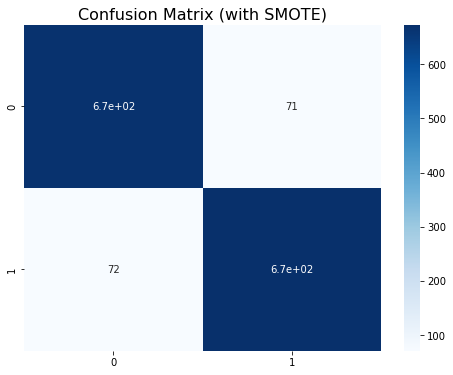

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

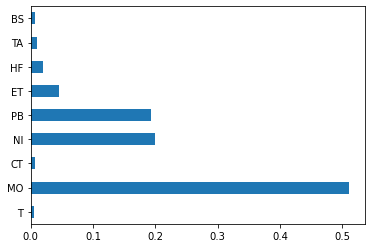

array([0, 8, 2, 7, 6, 5, 4, 3, 1], dtype=int64)

In [13]:
attr = model.feature_importances_
feat_importances = pd.Series(attr, index=X_train.columns)
feat_importances.plot(kind='barh')
plt.show()
attr.argsort()

In [8]:
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 20, num = 10)]
# Number of features to consider at every split
max_features = [3,4,5,6,7,8]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3,10, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5,10,15,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [5,10,15,20,25]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
grid_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [9]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = GridSearchCV(estimator = rf, param_grid = grid_search, cv = 10, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 28800 candidates, totalling 288000 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [3, 3, 4, 5, 5, 6, 7, 7, 8, 9, 10, None],
                         'max_features': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [5, 10, 15, 20, 25],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [5, 6, 8, 10, 11, 13, 15, 16, 18, 20]},
             verbose=2)

In [10]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 13}

In [11]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    
    print('Model Performance')
    print('Accuracy = {:0f}'.format(accuracy_score(y_test, preds)))
    print('Recall = {:0f}'.format(recall_score(y_test, preds)))
    return 
model = RandomForestClassifier(bootstrap= False, max_features = 6, min_samples_leaf = 5,n_estimators = 13,min_samples_split=15, random_state = 42)
model.fit(X_train, y_train)
accuracy = evaluate(model, X_test, y_test)

Model Performance
Accuracy = 0.903509
Recall = 0.903356


>lr 0.842 (0.013)
>per 0.836 (0.027)
>cart 0.880 (0.012)
>rf 0.878 (0.012)
>gbm 0.878 (0.014)


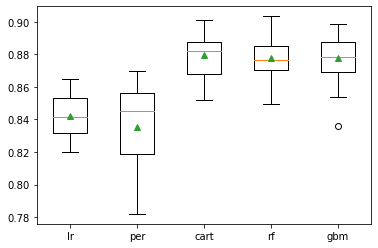

In [23]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
#def get_dataset():
#	X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
#	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# lr
	rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
	# perceptron
	rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
	# cart
	rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
	# rf
	rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
	# gbm
	rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X_train, y_train):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
#X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>lr 0.838 (0.014)
>per 0.837 (0.027)
>cart 0.878 (0.010)
>rf 0.877 (0.013)
>gbm 0.875 (0.012)


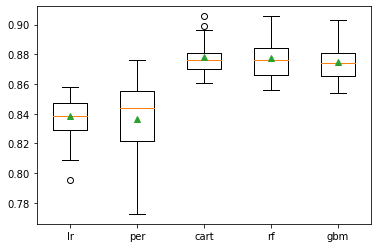

In [16]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
#def get_dataset():
#	X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
#	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# lr
	rfe = RFE(estimator=LogisticRegression(), n_features_to_select=6)
	model = DecisionTreeClassifier()
	models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
	# perceptron
	rfe = RFE(estimator=Perceptron(), n_features_to_select=6)
	model = DecisionTreeClassifier()
	models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
	# cart
	rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=6)
	model = DecisionTreeClassifier()
	models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
	# rf
	rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=6)
	model = DecisionTreeClassifier()
	models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
	# gbm
	rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=6)
	model = DecisionTreeClassifier()
	models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X_train, y_train):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
#X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>lr 0.842 (0.019)
>per 0.848 (0.019)
>cart 0.871 (0.014)
>rf 0.872 (0.014)
>gbm 0.872 (0.015)


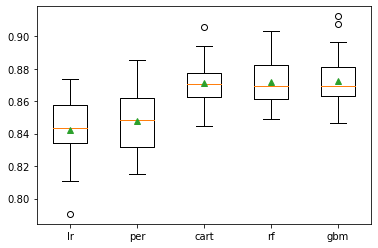

In [17]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
#def get_dataset():
#	X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
#	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# lr
	rfe = RFE(estimator=LogisticRegression(), n_features_to_select=7)
	model = DecisionTreeClassifier()
	models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
	# perceptron
	rfe = RFE(estimator=Perceptron(), n_features_to_select=7)
	model = DecisionTreeClassifier()
	models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
	# car
	rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=7)
	model = DecisionTreeClassifier()
	models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
	# rf
	rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=7)
	model = DecisionTreeClassifier()
	models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
	# gbm
	rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=7)
	model = DecisionTreeClassifier()
	models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X_train, y_train):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
#X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>lr 0.856 (0.011)
>per 0.823 (0.029)
>cart 0.877 (0.015)
>rf 0.880 (0.014)
>gbm 0.882 (0.013)


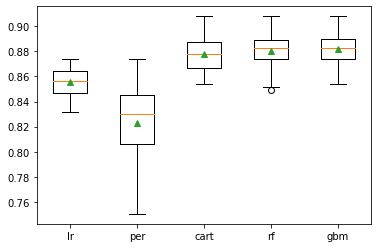

In [18]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
#def get_dataset():
#	X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
#	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# lr
	rfe = RFE(estimator=LogisticRegression(), n_features_to_select=4)
	model = DecisionTreeClassifier()
	models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
	# perceptron
	rfe = RFE(estimator=Perceptron(), n_features_to_select=4)
	model = DecisionTreeClassifier()
	models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
	# car
	rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=4)
	model = DecisionTreeClassifier()
	models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
	# rf
	rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=4)
	model = DecisionTreeClassifier()
	models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
	# gbm
	rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=4)
	model = DecisionTreeClassifier()
	models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X_train, y_train):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
#X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [45]:
grid_search = {'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = GridSearchCV(estimator = rf, param_grid = grid_search, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, None],
                         'min_samples_leaf': [1, 2, 4]},
             verbose=2)

[Text(0.5288461538461539, 0.9166666666666666, 'X[1] <= 4.5\ngini = 0.5\nsamples = 4446\nvalue = [2227, 2219]'),
 Text(0.3076923076923077, 0.75, 'X[3] <= 20.5\ngini = 0.377\nsamples = 2793\nvalue = [2088, 705]'),
 Text(0.15384615384615385, 0.5833333333333334, 'X[4] <= 12.5\ngini = 0.25\nsamples = 2242\nvalue = [1914, 328]'),
 Text(0.07692307692307693, 0.4166666666666667, 'X[4] <= 5.5\ngini = 0.136\nsamples = 1323\nvalue = [1226, 97]'),
 Text(0.038461538461538464, 0.25, 'X[4] <= 3.5\ngini = 0.41\nsamples = 302\nvalue = [215, 87]'),
 Text(0.019230769230769232, 0.08333333333333333, 'gini = 0.135\nsamples = 151\nvalue = [140, 11]'),
 Text(0.057692307692307696, 0.08333333333333333, 'gini = 0.5\nsamples = 151\nvalue = [75, 76]'),
 Text(0.11538461538461539, 0.25, 'X[5] <= 7.5\ngini = 0.019\nsamples = 1021\nvalue = [1011, 10]'),
 Text(0.09615384615384616, 0.08333333333333333, 'gini = 0.007\nsamples = 890\nvalue = [887, 3]'),
 Text(0.1346153846153846, 0.08333333333333333, 'gini = 0.101\nsamples 

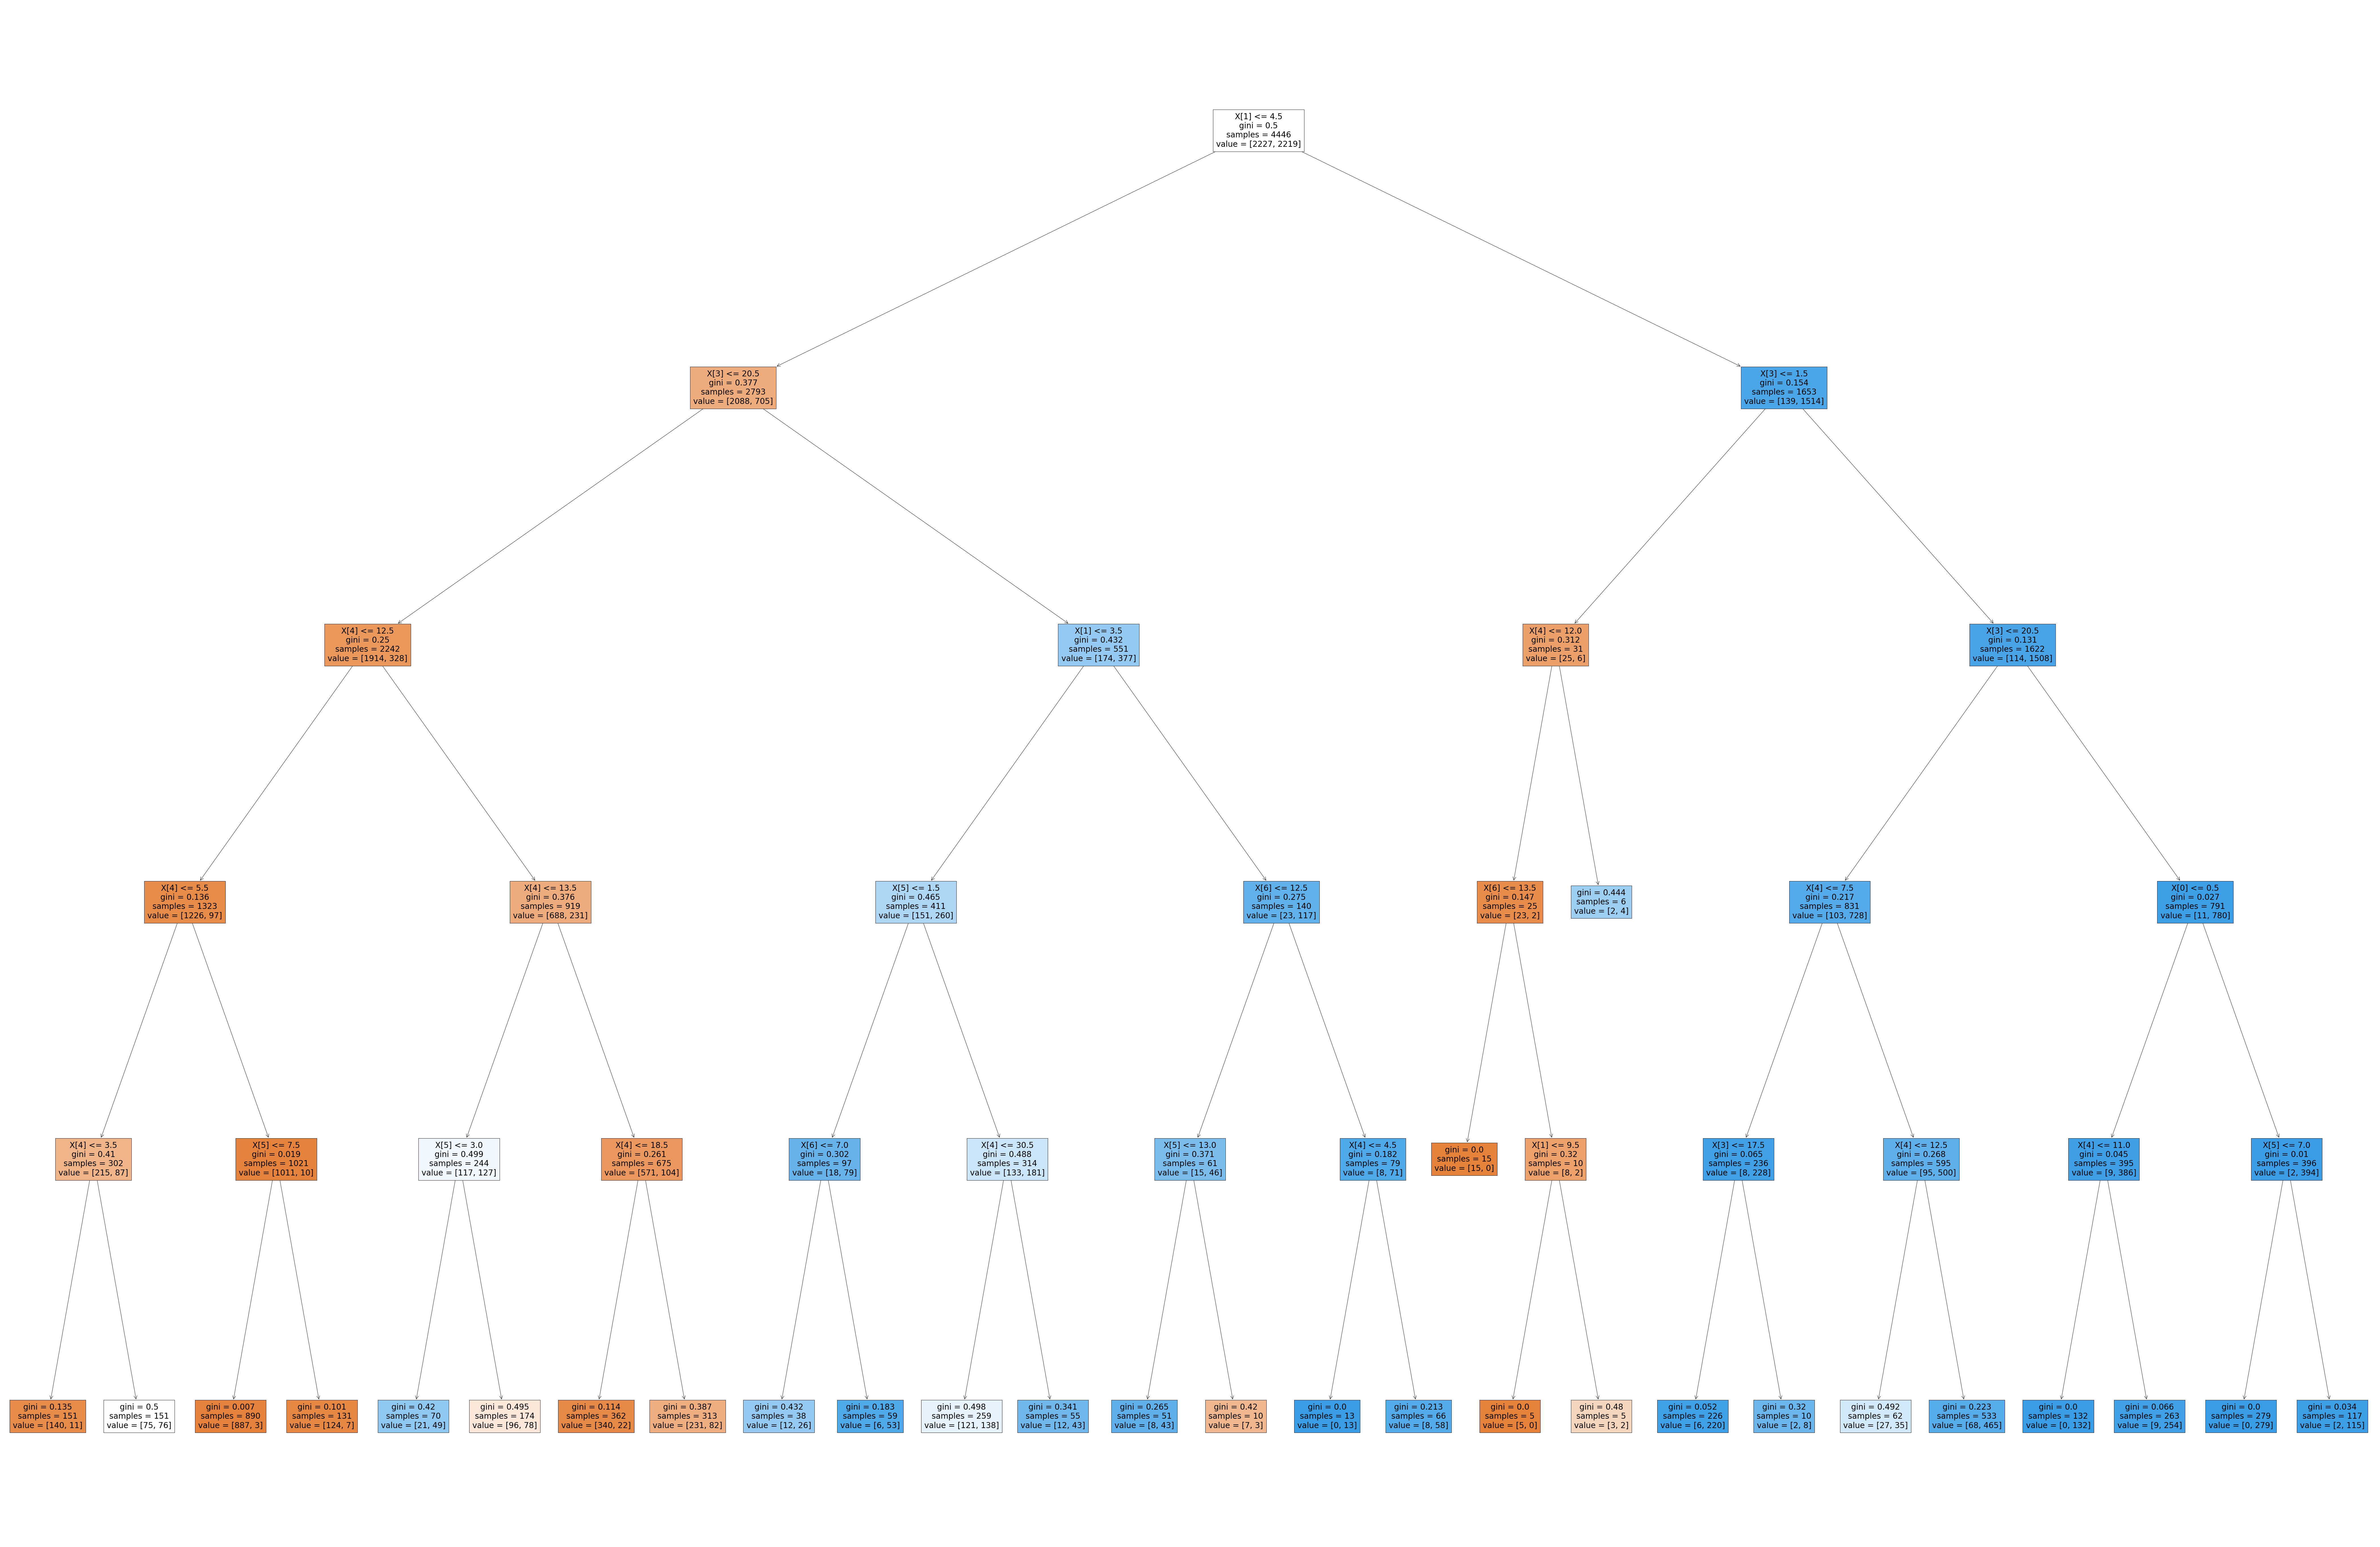

In [33]:
plt.figure(figsize=(150,100))
tree.plot_tree(model,filled= True)

Accuracy = 0.90
Recall = 0.89



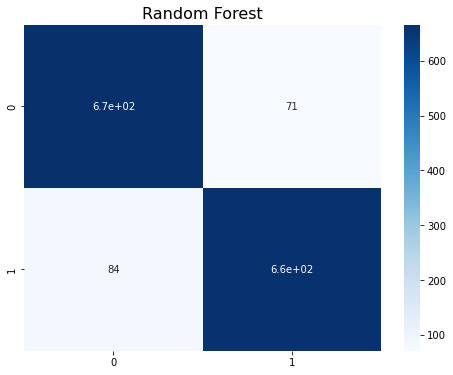

In [21]:
model = RandomForestClassifier(bootstrap= False, max_features = 6, min_samples_leaf = 5,n_estimators = 13,min_samples_split=15, random_state = 4000)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Random Forest', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');